c:\users\ameen\pycharmprojects\jexin\venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\ameen\pycharmprojects\jexin\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization fa

Testing Mean Squared Error is 103.40510107763824
Stored 'arimaValue' (str)
(841, 100)
(841,)
(214, 100)
(214,)
Epoch 1/100
14/14 [==============================] - 6s 201ms/step - loss: 0.0024 - val_loss: 0.0209

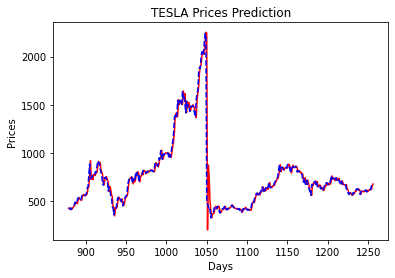

In [7]:
from tkinter import *
from PIL import ImageTk, Image
import threading
import os

def arima():
    %run Arima.ipynb

def lstm():
    %run LSTM.ipynb

def regression():
    %run Regression.ipynb

def thread1():
    t1 = threading.Thread(target=arima)
    t1.daemon = True
    t1.start()
    root.after(1000, checkArima)

def thread2():
    t2 = threading.Thread(target=lstm)
    t2.daemon = True
    t2.start()
    root.after(1000, checkLstm)

def thread3():
    t3 = threading.Thread(target=regression)
    t3.daemon = True
    t3.start()
    root.after(1000, checkRegression)

def checkArima():
    global img1
    if os.path.exists('arima.png'):
        img1 = ImageTk.PhotoImage(Image.open("arima.png"))
        Label(root, image=img1).grid(row=1, column=0)
        %store -r arimaValue
        a = StringVar(root, value=arimaValue)
        Entry(root, textvariable=a, width=30).grid(row=3, column=0, sticky=N)
        os.remove('arima.png')
    else:
        root.after(1000, checkArima)

def checkLstm():
    global img2
    if os.path.exists('lstm.png'):
        img2 = ImageTk.PhotoImage(Image.open("lstm.png"))
        Label(root, image=img2).grid(row=1, column=1)
        %store -r lstmValue
        l = StringVar(root, value=lstmValue)
        Entry(root, textvariable=l, width=30).grid(row=3, column=1, sticky=N)
        os.remove('lstm.png')
    else:
        root.after(1000, checkLstm)


def checkRegression():
    global img3
    if os.path.exists('regression.png'):
        img3 = ImageTk.PhotoImage(Image.open("regression.png"))
        Label(root, image=img3).grid(row=1, column=2)
        %store -r regValue
        r = StringVar(root, value=regValue)
        Entry(root, textvariable=r, width=30).grid(row=3, column=2, sticky=N)
        os.remove('regression.png')
    else:
        root.after(1000, checkRegression)


root = Tk()
root.title("Stock Prediction And Forecast")
root.resizable(width=False, height=False)
root.geometry('1250x500')

root.rowconfigure(0, weight=1, uniform='row')
root.rowconfigure(1, weight=5, uniform='row')
root.rowconfigure(2, weight=1, uniform='row')
root.rowconfigure(3, weight=1, uniform='row')
root.columnconfigure(0, weight=1, uniform='column')
root.columnconfigure(1, weight=1, uniform='column')
root.columnconfigure(2, weight=1, uniform='column')

Button(root, text="Arima", command=thread1).grid(row=0, column=0)
Button(root, text="LSTM", command=thread2).grid(row=0, column=1)
Button(root, text="Regression", command=thread3).grid(row=0, column=2)

img1 = ImageTk.PhotoImage(Image.open("DefaultArima.png"))
Label(root, image=img1).grid(row=1, column=0)
img2 = ImageTk.PhotoImage(Image.open("DefaultLstm.png"))
Label(root, image=img2).grid(row=1, column=1)
img3 = ImageTk.PhotoImage(Image.open("DefaultRegression.png"))
Label(root, image=img3).grid(row=1, column=2)

Label(root, text="Testing Mean Squared Error", font=('Calibri', 12)).grid(row=2, column=0)
Label(root, text="RMS Value of the Test Data using LSTM", font=('Calibri', 12)).grid(row=2, column=1)
Label(root, text="RMS Error using Linear Regression", font=('Calibri', 12)).grid(row=2, column=2)

Entry(root, width=30).grid(row=3, column=0, sticky=N)
Entry(root, width=30).grid(row=3, column=1, sticky=N)
Entry(root, width=30).grid(row=3, column=2, sticky=N)

root.mainloop()